In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys
import statistics as stats

In [2]:
movie_budgets_clean=pd.read_csv('movie_budgets_clean')


In [3]:
movie_budgets_clean['budget_gross_diff'] = movie_budgets_clean['worldwide_gross'] - movie_budgets_clean['production_budget']
movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [16]:
movie_budgets_clean['roi'] = (movie_budgets_clean['worldwide_gross'] / movie_budgets_clean['production_budget'] ) -1

In [17]:
movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


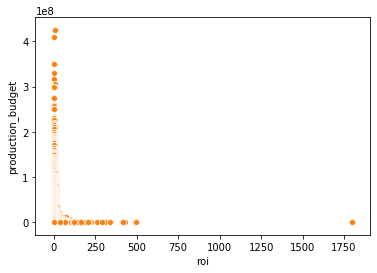

In [18]:
sns.scatterplot(x = movie_budgets_clean['roi'], y= movie_budgets_clean['production_budget']);
sorted_list = movie_budgets_clean.sort_values(by= ['roi'] , ascending=False)

x = pd.Series(np.random.normal(size= 5782)) # 200 values
x = x[x.between(x.quantile(.15), x.quantile(.85))]

sns.distplot(x);

sns.scatterplot(x= movie_budgets_clean['roi'], y= movie_budgets_clean['production_budget']);

In [19]:
movie_budgets_clean.describe()

,id,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,6.672803e+07,4.267876
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,1.518522e+08,30.997659
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,-2.002376e+08,-0.999875
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,-1.396634e+06,-0.241161
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,1.357260e+07,0.961653
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,7.088258e+07,3.059457
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,1799.000000


In [20]:
movie_budgets_outliers = movie_budgets_clean[movie_budgets_clean['roi'] < 62]

In [33]:
movie_budgets_outliers = movie_budgets_clean[movie_budgets_clean['production_budget'] >100000000]

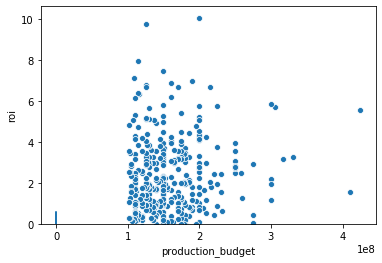

In [34]:
sns.scatterplot(x = movie_budgets_outliers['production_budget'], y= movie_budgets_outliers['roi']);
sorted_list = movie_budgets_outliers.sort_values(by= ['roi'] , ascending=False)

x = pd.Series(np.random.normal(size= 5782)) # 200 values
x = x[x.between(x.quantile(.15), x.quantile(.85))]

sns.distplot(x);


In [19]:
def get_mean(data):
    print(stats.mean(data))

In [9]:
movie_budgets_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,4.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2.153696
...,...,...,...,...,...,...,...,...
5229,76,"May 26, 2006",Cavite,7000,70071,71644,64644,8.234857
5230,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-1.871429
5231,79,"Apr 2, 1999",Following,6000,48482,240495,234495,38.082500
5232,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-1.732400


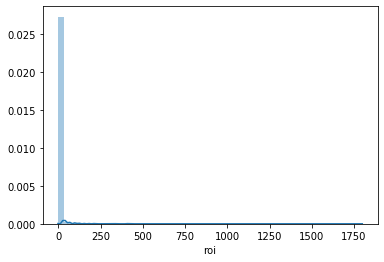

In [15]:
x = np.random.normal(size=100)
sns.distplot(movie_budgets_clean['roi'])